# Определение перспективности тарифа

**цель:** сравение тарифов «Смарт» и «Ультра», анализ поведения клиентов.

Клиентам предлагается два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
У нас в распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

## 1. Загрузка данных

In [2]:
import pandas as pd
import numpy as np
calls = pd.read_csv('C:/Users/kast1/Desktop/практикум/projects/calls.csv')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
internet = pd.read_csv('C:/Users/kast1/Desktop/практикум/projects/internet.csv')
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [4]:
messages = pd.read_csv('C:/Users/kast1/Desktop/практикум/projects/messages.csv')
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [20]:
tariffs = pd.read_csv('C:/Users/kast1/Desktop/практикум/projects/tariffs.csv')
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs.columns = ['messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff_name']
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [21]:
users = pd.read_csv('C:/Users/kast1/Desktop/практикум/projects/users.csv')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Вывод

Данные загружены, необходимо заполнить пропуски, проверить на наличие дубликатов, изменить типы данных

## 2. Предобработка данных

- Таблица calls

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [23]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [24]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
month        0
dtype: int64

In [25]:
calls.duplicated().sum()

0

In [26]:
calls.query('duration == 0')

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,2018-07-01
1,1000_1,2018-08-17,0.0,1000,2018-08-01
5,1000_5,2018-11-02,0.0,1000,2018-11-01
6,1000_6,2018-10-18,0.0,1000,2018-10-01
9,1000_9,2018-08-15,0.0,1000,2018-08-01
...,...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499,2018-12-01
202592,1499_205,2018-10-13,0.0,1499,2018-10-01
202593,1499_206,2018-12-26,0.0,1499,2018-12-01
202594,1499_207,2018-10-28,0.0,1499,2018-10-01


In [27]:
print('Процент записей с нулевой длительностью звонка:', 
     (calls.query('duration == 0')['duration'].count() * 100 / len(calls['duration'])).round(0))


Процент записей с нулевой длительностью звонка: 20.0


Много нулей в "cal duration" (примерно 20%). Предположение по нулевым звонкам - это пропущенные (сброшенные). Например, оператор фиксирует начало разговора только после "поднятия трубки". В таком случае разговор с роботом (автоответчик/голосовой помощник) не будет зафиксирован. Удалять и заменять их не нужно, они показывают активность клиентов, хоть и без трафика.

- Таблица internet

In [28]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [29]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [30]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [31]:
print('Процент записей с нулевым объемом трафика:', 
     (internet.query('mb_used == 0')['mb_used'].count() * 100 / len(internet['mb_used'])).round(0))

Процент записей с нулевым объемом трафика: 13.0


Много нулей в "mb_used" (примерно 13%). 

Предположения по нулевому трафику:

- Подключение есть, а трафика нет - роутер подключается к сети, но обмена данными не происходит.
- Тарифицируются сессии, начиная с определенного размера (у кого-то со 150КБ, у кого-то 300КБ). Соответственно то, что меньше считается нулем.
- Может быть, для каких-то соцсетей трафик бесплатный, поэтому определенный трафик могут помечать нулем, чтобы не считать.

In [32]:
#необходимо удалить столбкец Unnamed:0, так как он просто дублирует порядковый номер
del internet['Unnamed: 0']
internet


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [33]:
internet.duplicated().sum()


0

- Таблица messages

In [34]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [35]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [36]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

- Таблица tariffs

In [37]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   rub_monthly_fee        2 non-null      int64  
 4   rub_per_gb             2 non-null      int64  
 5   rub_per_message        2 non-null      int64  
 6   rub_per_minute         2 non-null      int64  
 7   tariff_name            2 non-null      object 
dtypes: float64(1), int64(6), object(1)
memory usage: 184.0+ bytes


- Таблица users

In [38]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.6+ KB


In [39]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [40]:
users.duplicated().sum()

0

In [41]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропуски в столбцу churn_date обусловлены тем, что тариф ещё действовал на момент выгрузки данных

## Вывод

Пропуски выявлены, типы данных все соответствуют своим значениям.

## 3. Расчет и добаление данных в таблицы

### Количество израсходованных минут разговора по месяцам и их стоимость

In [42]:
calls.reset_index(drop=True)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,2018-07-01
1,1000_1,2018-08-17,0.00,1000,2018-08-01
2,1000_2,2018-06-11,2.85,1000,2018-06-01
3,1000_3,2018-09-21,13.80,1000,2018-09-01
4,1000_4,2018-12-15,5.18,1000,2018-12-01
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,2018-12-01
202603,1499_216,2018-10-18,18.83,1499,2018-10-01
202604,1499_217,2018-11-10,10.81,1499,2018-11-01
202605,1499_218,2018-10-06,4.27,1499,2018-10-01


In [43]:
calls['duration'].sum()

1368790.0399999998

In [44]:
calls_grouped = calls.groupby([ 'user_id','month'])['duration'].sum().reset_index()
calls_grouped


,user_id,month,duration
0,1000,2018-05-01,150.06
1,1000,2018-06-01,158.90
2,1000,2018-07-01,318.80
3,1000,2018-08-01,389.87
4,1000,2018-09-01,440.14
...,...,...,...
3169,1498,2018-10-01,232.63
3170,1499,2018-09-01,64.65
3171,1499,2018-10-01,429.91
3172,1499,2018-11-01,576.50


In [45]:
#проверка
calls_grouped['duration'].sum() 

1368790.04

In [46]:
#объединение с users
total_calls = pd.merge(calls_grouped, users, how = 'left', on= 'user_id')
total_calls

,user_id,month,duration,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,150.06,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,158.90,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,318.80,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,389.87,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,440.14,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3169,1498,2018-10-01,232.63,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3170,1499,2018-09-01,64.65,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3171,1499,2018-10-01,429.91,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3172,1499,2018-11-01,576.50,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [47]:
#проверка
assert calls_grouped['duration'].sum()  == total_calls['duration'].sum() 

In [48]:
#округление минут
total_calls['duration'] = np.ceil(total_calls['duration'])
total_calls

,user_id,month,duration,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,151.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,159.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,319.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,390.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,441.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3169,1498,2018-10-01,233.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3170,1499,2018-09-01,65.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3171,1499,2018-10-01,430.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3172,1499,2018-11-01,577.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [49]:
def price_minutes (row):
    tariff = row['tariff']
    duration = row['duration']
    if tariff == 'smart' and duration <= tariffs.iloc[0][2]:
        return 0
    if tariff == 'smart' and duration > tariffs.iloc[0][2]:
        return (duration - tariffs.iloc[0][3]) * tariffs.iloc[0][6] 
    if tariff == 'ultra' and duration <= tariffs.iloc[1][2]:
        return 0
    if tariff == 'ultra' and duration > tariffs.iloc[1][2]:
        return (duration - tariffs.iloc[1][2]) * tariffs.iloc[1][6] 
total_calls['extra_min_price'] = total_calls.apply(price_minutes, axis=1)

In [50]:
total_calls

,user_id,month,duration,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_min_price
0,1000,2018-05-01,151.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
1,1000,2018-06-01,159.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
2,1000,2018-07-01,319.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
3,1000,2018-08-01,390.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
4,1000,2018-09-01,441.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,2018-10-01,233.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0.0
3170,1499,2018-09-01,65.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0.0
3171,1499,2018-10-01,430.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0.0
3172,1499,2018-11-01,577.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,81.0


In [51]:
total_calls['duration'].sum()

1370366.0

### Количество израсходованных сообщений по месяцам и их стоимость

In [52]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].values.astype('datetime64[M]')
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01
...,...,...,...,...
123031,1499_179,2018-12-12,1499,2018-12-01
123032,1499_180,2018-09-28,1499,2018-09-01
123033,1499_181,2018-09-27,1499,2018-09-01
123034,1499_182,2018-11-15,1499,2018-11-01


In [53]:
messages['message_date'].count()

123036

In [54]:
mes_grouped = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()
mes_grouped.columns = ['user_id', 'month', 'messages']
mes_grouped

,user_id,month,messages
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


In [55]:
mes_grouped['messages'].sum()

123036

In [56]:
total_mes = pd.merge(mes_grouped, users, how = 'left', on= 'user_id')

In [57]:
total_mes

,user_id,month,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
2712,1498,2018-10-01,42,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
2713,1499,2018-09-01,11,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
2714,1499,2018-10-01,48,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
2715,1499,2018-11-01,59,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [58]:
#проверка
assert mes_grouped['messages'].sum()  == total_mes['messages'].sum() 

In [59]:
def price_mes (row):
    tariff = row['tariff']
    mes = row['messages']
    if tariff == 'smart' and mes <= tariffs.iloc[0][0]:
        return 0
    if tariff == 'smart' and mes > tariffs.iloc[0][0]:
        return (mes - tariffs.iloc[0][0]) * tariffs.iloc[0][5]
    if tariff == 'ultra' and mes <= tariffs.iloc[0][1]:
        return 0
    if tariff == 'ultra' and mes > tariffs.iloc[0][1]:
        return (mes - tariffs.iloc[0][1]) * tariffs.iloc[1][5] 
total_mes['extra_mes_price'] = total_mes.apply(price_mes, axis=1)

In [60]:
total_mes

,user_id,month,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_mes_price
0,1000,2018-05-01,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0
1,1000,2018-06-01,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,45.0
2,1000,2018-07-01,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,60.0
3,1000,2018-08-01,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,66.0
4,1000,2018-09-01,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,42.0
...,...,...,...,...,...,...,...,...,...,...,...
2712,1498,2018-10-01,42,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0.0
2713,1499,2018-09-01,11,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0.0
2714,1499,2018-10-01,48,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0.0
2715,1499,2018-11-01,59,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,27.0


### Количество израсходованных гигабайт по месяцам и их стоимость

In [61]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].values.astype('datetime64[M]')

In [62]:
internet['mb_used'].sum()

55305267.73

In [63]:
int_grouped = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
int_grouped

,user_id,month,mb_used
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91
...,...,...,...
3198,1498,2018-10-01,20579.36
3199,1499,2018-09-01,1845.75
3200,1499,2018-10-01,17788.51
3201,1499,2018-11-01,17963.31


In [64]:
# проверка
int_grouped['mb_used'].sum()

55305267.730000004

In [65]:
total_int = pd.merge(int_grouped, users, how = 'left', on= 'user_id')
total_int

,user_id,month,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,20579.36,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3199,1499,2018-09-01,1845.75,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3200,1499,2018-10-01,17788.51,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3201,1499,2018-11-01,17963.31,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [66]:
#проверка
assert int_grouped['mb_used'].sum()  == total_int['mb_used'].sum() 

In [67]:
# перевод в ГБ
total_int['mb_used'] = total_int['mb_used'] / 1024
total_int['mb_used'] = np.ceil(total_int['mb_used'])
total_int.columns = ['user_id', 'month', 'gb_used', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff']
total_int

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09-01,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,21.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3199,1499,2018-09-01,2.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3200,1499,2018-10-01,18.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3201,1499,2018-11-01,18.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [68]:
def price_gb (row):
    tariff = row['tariff']
    gb = row['gb_used']
    if tariff == 'smart' and gb <= tariffs.iloc[0][1]:
        return 0
    if tariff == 'smart' and gb > tariffs.iloc[0][1]:
        return (gb - tariffs.iloc[0][1]) * tariffs.iloc[0][4]
    if tariff == 'ultra' and gb <= tariffs.iloc[1][1]:
        return 0
    if tariff == 'ultra' and gb > tariffs.iloc[1][1]:
        return (gb - tariffs.iloc[1][1]) * tariffs.iloc[1][4]
total_int['extra_gb_price'] = total_int.apply(price_gb, axis=1)

In [69]:
total_int

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price
0,1000,2018-05-01,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
1,1000,2018-06-01,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
2,1000,2018-07-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
3,1000,2018-08-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
4,1000,2018-09-01,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,21.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1200.0
3199,1499,2018-09-01,2.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0.0
3200,1499,2018-10-01,18.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,600.0
3201,1499,2018-11-01,18.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,600.0


In [70]:
total_int['gb_used'].sum()

55599.0

## Общая таблица

In [71]:
total = pd.merge(total_int, total_calls, how = 'outer', on= ['user_id', 'month', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff'])
total

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price,duration,extra_min_price
0,1000,2018-05-01,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,151.0,0.0
1,1000,2018-06-01,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,159.0,0.0
2,1000,2018-07-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,319.0,0.0
3,1000,2018-08-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,390.0,0.0
4,1000,2018-09-01,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,441.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,2018-11-01,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,NaN,257.0,0.0
3210,1273,2018-12-01,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,NaN,242.0,0.0
3211,1377,2018-02-01,NaN,59,NaN,Брянск,Альфред,Семин,2018-02-25,ultra,NaN,169.0,0.0
3212,1392,2018-02-01,NaN,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,NaN,12.0,0.0


In [72]:
total = pd.merge(total, total_mes, how = 'outer', on= ['user_id', 'month', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff'])
total

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price,duration,extra_min_price,messages,extra_mes_price
0,1000,2018-05-01,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,151.0,0.0,22.0,7.0
1,1000,2018-06-01,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,159.0,0.0,60.0,45.0
2,1000,2018-07-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,319.0,0.0,75.0,60.0
3,1000,2018-08-01,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,390.0,0.0,81.0,66.0
4,1000,2018-09-01,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,441.0,0.0,57.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,2018-11-01,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,NaN,257.0,0.0,29.0,14.0
3210,1273,2018-12-01,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,NaN,242.0,0.0,39.0,24.0
3211,1377,2018-02-01,NaN,59,NaN,Брянск,Альфред,Семин,2018-02-25,ultra,NaN,169.0,0.0,2.0,0.0
3212,1392,2018-02-01,NaN,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,NaN,12.0,0.0,3.0,0.0


In [73]:
# все сходится
total['duration'].sum()

1370366.0

In [74]:
total['gb_used'].sum()

55599.0

In [75]:
total['messages'].sum()

123036.0

In [76]:
def price (row):
    tariff = row['tariff']
    gb = row['extra_gb_price']
    minute = row['extra_min_price']
    mes = row['extra_mes_price']
    if tariff == 'smart':
        return gb + minute + mes + tariffs.iloc[0][3]
    if tariff == 'ultra':
        return gb + minute + mes + tariffs.iloc[1][3]
total['revenue_per_month'] = total.apply(price, axis=1)

In [77]:
# пропуски в столбце можно заполнить на любую дату после 2018 года как техническая замена
total['churn_date'] = total['churn_date'].fillna('2020-02-02')
total['churn_date'] = pd.to_datetime(total['churn_date'], format='%Y-%m-%d')
# пропуски в столбцах extra_price можно заменить на 0, так как не всегда были доп. минуты и т.д. 
total = total.fillna(0)
total

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price,duration,extra_min_price,messages,extra_mes_price,revenue_per_month
0,1000,2018-05-01,3.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,151.0,0.0,22.0,7.0,1957.0
1,1000,2018-06-01,23.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,159.0,0.0,60.0,45.0,1995.0
2,1000,2018-07-01,14.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,319.0,0.0,75.0,60.0,2010.0
3,1000,2018-08-01,14.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,390.0,0.0,81.0,66.0,2016.0
4,1000,2018-09-01,15.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,441.0,0.0,57.0,42.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,2018-11-01,0.0,46,2020-02-02,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,257.0,0.0,29.0,14.0,0.0
3210,1273,2018-12-01,0.0,46,2020-02-02,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,242.0,0.0,39.0,24.0,0.0
3211,1377,2018-02-01,0.0,59,2020-02-02,Брянск,Альфред,Семин,2018-02-25,ultra,0.0,169.0,0.0,2.0,0.0,0.0
3212,1392,2018-02-01,0.0,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,0.0,12.0,0.0,3.0,0.0,0.0


## Тариф Smart

In [78]:
smart = total[total['tariff'] == 'smart']
smart

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price,duration,extra_min_price,messages,extra_mes_price,revenue_per_month
8,1001,2018-11-01,18.0,41,2020-02-02,Москва,Иван,Ежов,2018-11-01,smart,600.0,409.0,0.0,0.0,0.0,0.0
9,1001,2018-12-01,14.0,41,2020-02-02,Москва,Иван,Ежов,2018-11-01,smart,0.0,392.0,0.0,0.0,0.0,0.0
10,1002,2018-06-01,11.0,59,2020-02-02,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,111.0,0.0,4.0,0.0,550.0
11,1002,2018-07-01,18.0,59,2020-02-02,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,600.0,205.0,0.0,11.0,0.0,1150.0
12,1002,2018-08-01,20.0,59,2020-02-02,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,1000.0,270.0,0.0,13.0,0.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1499,2018-09-01,2.0,35,2020-02-02,Пермь,Гектор,Корнилов,2018-09-27,smart,0.0,65.0,0.0,11.0,0.0,550.0
3200,1499,2018-10-01,18.0,35,2020-02-02,Пермь,Гектор,Корнилов,2018-09-27,smart,600.0,430.0,0.0,48.0,0.0,1150.0
3201,1499,2018-11-01,18.0,35,2020-02-02,Пермь,Гектор,Корнилов,2018-09-27,smart,600.0,577.0,81.0,59.0,27.0,1258.0
3202,1499,2018-12-01,13.0,35,2020-02-02,Пермь,Гектор,Корнилов,2018-09-27,smart,0.0,466.0,0.0,66.0,48.0,598.0


In [79]:
smart['revenue_per_month'].sum()

2327819.0

In [80]:
smart['customer'] = 1

<ipython-input-80-6e2a13b3000b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart['customer'] = 1


In [81]:
active_cus = smart.groupby('month')[['customer','revenue_per_month']].sum().reset_index()
active_cus['revenue_per_person'] = active_cus['revenue_per_month'] / active_cus['customer']
active_cus

,month,customer,revenue_per_month,revenue_per_person
0,2018-01-01,34,22456.0,660.470588
1,2018-02-01,58,38753.0,668.155172
2,2018-03-01,77,72905.0,946.818182
3,2018-04-01,112,88028.0,785.964286
4,2018-05-01,141,141310.0,1002.198582
5,2018-06-01,164,161648.0,985.658537
6,2018-07-01,201,201459.0,1002.283582
7,2018-08-01,235,259327.0,1103.519149
8,2018-09-01,260,262487.0,1009.565385
9,2018-10-01,294,326779.0,1111.493197


* Выручка росла на протяжении всего года

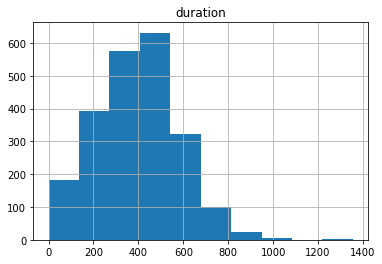

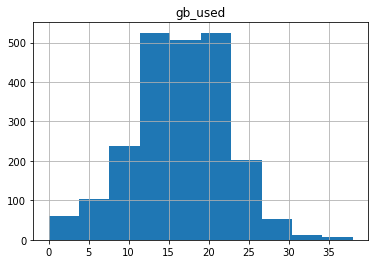

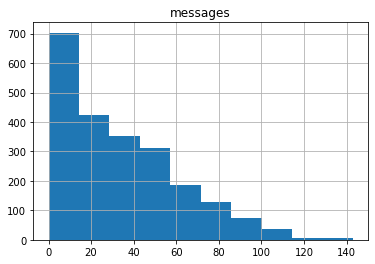

In [82]:
smart_list = ['duration', 'gb_used', 'messages']
for i in smart_list:
    smart.hist(i)


**Большинству пользователей тарифа Смарт хватает включенных в тариф минут и сообщений, но большинству не хватает интернета**

In [83]:
for i in smart_list:
    print('среднее',i, smart[i].mean())

среднее duration 394.92238672050246
среднее gb_used 16.328847016599372
среднее messages 33.384028712427096


In [84]:
for i in smart_list:
    print('дисперсия',i, np.var(smart[i], ddof=1))

дисперсия duration 32392.905553367396
дисперсия gb_used 33.028705178111586
дисперсия messages 796.8129584480083


In [85]:
for i in smart_list:
    print('среднее отклонение',i, np.std(smart[i], ddof=1))

среднее отклонение duration 179.9802921249085
среднее отклонение gb_used 5.747060568509052
среднее отклонение messages 28.22787555676141


**сводные таблицы для графиков сравнения поведения клиентов**

In [86]:
total_min_s = smart.groupby('month')[['customer','duration']].sum().reset_index()
total_min_s['mean_duration'] = total_min_s['duration'] / total_min_s['customer']
total_min_s

,month,customer,duration,mean_duration
0,2018-01-01,34,6579.0,193.500000
1,2018-02-01,58,16438.0,283.413793
2,2018-03-01,77,28362.0,368.337662
3,2018-04-01,112,38838.0,346.767857
4,2018-05-01,141,51565.0,365.709220
5,2018-06-01,164,61283.0,373.676829
6,2018-07-01,201,77587.0,386.004975
7,2018-08-01,235,93616.0,398.365957
8,2018-09-01,260,105303.0,405.011538
9,2018-10-01,294,118412.0,402.761905


In [87]:
total_gb_s = smart.groupby('month')[['customer','gb_used']].sum().reset_index()
total_gb_s['mean_gb_used'] = total_gb_s['gb_used'] / total_gb_s['customer']
total_gb_s

,month,customer,gb_used,mean_gb_used
0,2018-01-01,34,297.0,8.735294
1,2018-02-01,58,687.0,11.844828
2,2018-03-01,77,1173.0,15.233766
3,2018-04-01,112,1526.0,13.625000
4,2018-05-01,141,2243.0,15.907801
5,2018-06-01,164,2616.0,15.951220
6,2018-07-01,201,3191.0,15.875622
7,2018-08-01,235,3933.0,16.736170
8,2018-09-01,260,4262.0,16.392308
9,2018-10-01,294,4963.0,16.880952


In [88]:
total_mes_s = smart.groupby('month')[['customer','messages']].sum().reset_index()
total_mes_s['mean_messages'] = total_mes_s['messages'] / total_mes_s['customer']
total_mes_s

,month,customer,messages,mean_messages
0,2018-01-01,34,620.0,18.235294
1,2018-02-01,58,1397.0,24.086207
2,2018-03-01,77,2453.0,31.857143
3,2018-04-01,112,3443.0,30.741071
4,2018-05-01,141,4762.0,33.773050
5,2018-06-01,164,5478.0,33.402439
6,2018-07-01,201,6784.0,33.751244
7,2018-08-01,235,7905.0,33.638298
8,2018-09-01,260,8746.0,33.638462
9,2018-10-01,294,9927.0,33.765306


## Тариф Ultra

In [89]:
ultra = total[total['tariff'] == 'ultra']
ultra

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price,duration,extra_min_price,messages,extra_mes_price,revenue_per_month
0,1000,2018-05-01,3.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,151.0,0.0,22.0,7.0,1957.0
1,1000,2018-06-01,23.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,159.0,0.0,60.0,45.0,1995.0
2,1000,2018-07-01,14.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,319.0,0.0,75.0,60.0,2010.0
3,1000,2018-08-01,14.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,390.0,0.0,81.0,66.0,2016.0
4,1000,2018-09-01,15.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,441.0,0.0,57.0,42.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1273,2018-10-01,0.0,46,2020-02-02,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,296.0,0.0,35.0,20.0,0.0
3209,1273,2018-11-01,0.0,46,2020-02-02,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,257.0,0.0,29.0,14.0,0.0
3210,1273,2018-12-01,0.0,46,2020-02-02,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,242.0,0.0,39.0,24.0,0.0
3211,1377,2018-02-01,0.0,59,2020-02-02,Брянск,Альфред,Семин,2018-02-25,ultra,0.0,169.0,0.0,2.0,0.0,0.0


In [90]:
ultra['revenue_per_month'].sum()

1576725.0

In [91]:
ultra['customer'] = 1

<ipython-input-91-e404bf499c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultra['customer'] = 1


In [92]:
active_cus_u = ultra.groupby('month')[['customer','revenue_per_month']].sum().reset_index()
active_cus_u['revenue_per_person'] = active_cus_u['revenue_per_month'] / active_cus_u['customer']
active_cus_u

,month,customer,revenue_per_month,revenue_per_person
0,2018-01-01,9,13861.0,1540.111111
1,2018-02-01,24,28244.0,1176.833333
2,2018-03-01,37,51253.0,1385.216216
3,2018-04-01,55,75932.0,1380.581818
4,2018-05-01,67,98653.0,1472.432836
5,2018-06-01,84,129549.0,1542.250000
6,2018-07-01,91,146526.0,1610.175824
7,2018-08-01,107,172354.0,1610.785047
8,2018-09-01,115,185058.0,1609.200000
9,2018-10-01,123,206060.0,1675.284553


* Выручка росла на протяжении всего года

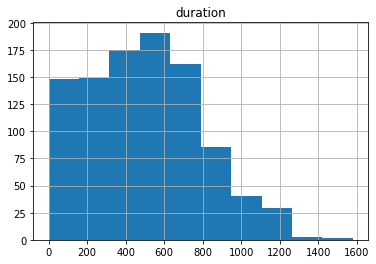

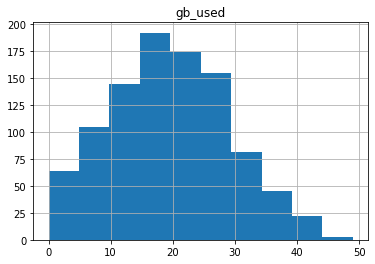

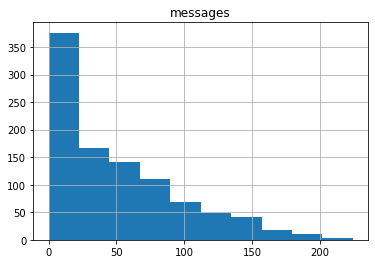

In [93]:
ultra_list = ['duration', 'gb_used', 'messages']
for i in ultra_list:
    ultra.hist(i)
    

**Всем пользователям тарифа Ультра хватает включенных в тариф минут и сообщений и большинству хватает интернета.**

In [94]:
ultra_list = ['duration', 'gb_used', 'messages']
for i in ultra_list:
    print('среднее',i, ultra[i].mean())

среднее duration 497.5472081218274
среднее gb_used 19.494416243654822
среднее messages 49.36345177664975


In [95]:
for i in ultra_list:
    print('дисперсия',i, np.var(ultra[i], ddof=1))

дисперсия duration 89957.71956790889
дисперсия gb_used 97.09168626965473
дисперсия messages 2285.2661425446845


In [96]:
for i in ultra_list:
    print('среднее отклонение',i, np.std(ultra[i], ddof=1))

среднее отклонение duration 299.92952433514927
среднее отклонение gb_used 9.8535113675103
среднее отклонение messages 47.80445735017483


In [97]:
total_min_u = ultra.groupby('month')[['customer','duration']].sum().reset_index()
total_min_u['mean_duration'] = total_min_u['duration'] / total_min_u['customer']
total_min_u

,month,customer,duration,mean_duration
0,2018-01-01,9,3648.0,405.333333
1,2018-02-01,24,6747.0,281.125000
2,2018-03-01,37,17130.0,462.972973
3,2018-04-01,55,23780.0,432.363636
4,2018-05-01,67,32308.0,482.208955
5,2018-06-01,84,38090.0,453.452381
6,2018-07-01,91,46928.0,515.692308
7,2018-08-01,107,51617.0,482.401869
8,2018-09-01,115,58604.0,509.600000
9,2018-10-01,123,64859.0,527.308943


In [98]:
total_gb_u = ultra.groupby('month')[['customer','gb_used']].sum().reset_index()
total_gb_u['mean_gb_used'] = total_gb_u['gb_used'] / total_gb_u['customer']
total_gb_u

,month,customer,gb_used,mean_gb_used
0,2018-01-01,9,119.0,13.222222
1,2018-02-01,24,288.0,12.000000
2,2018-03-01,37,653.0,17.648649
3,2018-04-01,55,933.0,16.963636
4,2018-05-01,67,1298.0,19.373134
5,2018-06-01,84,1591.0,18.940476
6,2018-07-01,91,1866.0,20.505495
7,2018-08-01,107,2097.0,19.598131
8,2018-09-01,115,2213.0,19.243478
9,2018-10-01,123,2468.0,20.065041


In [99]:
total_mes_u = ultra.groupby('month')[['customer','messages']].sum().reset_index()
total_mes_u['mean_messages'] = total_mes_u['messages'] / total_mes_u['customer']
total_mes_u

,month,customer,messages,mean_messages
0,2018-01-01,9,304.0,33.777778
1,2018-02-01,24,527.0,21.958333
2,2018-03-01,37,1195.0,32.297297
3,2018-04-01,55,1736.0,31.563636
4,2018-05-01,67,2536.0,37.850746
5,2018-06-01,84,3505.0,41.726190
6,2018-07-01,91,4536.0,49.846154
7,2018-08-01,107,5183.0,48.439252
8,2018-09-01,115,6013.0,52.286957
9,2018-10-01,123,7187.0,58.430894


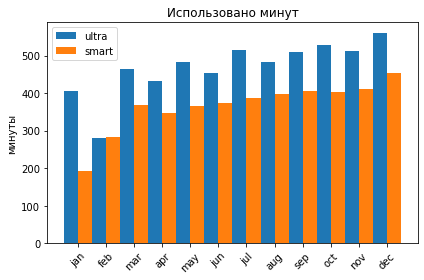

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# FIXIT - тут была пропущена переменная width
width = 0.5

labels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
ultra_min = total_min_u['mean_duration']
smart_min = total_min_s['mean_duration']

x = np.arange(len(labels)) 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ultra_min, width, label='ultra')
rects2 = ax.bar(x + width/2, smart_min, width, label='smart')

ax.set_ylabel('минуты')
ax.set_title('Использовано минут')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

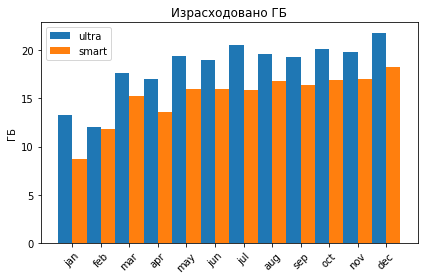

In [101]:

labels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
ultra_gb = total_gb_u['mean_gb_used']
smart_gb = total_gb_s['mean_gb_used']

x = np.arange(len(labels)) 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ultra_gb, width, label='ultra')
rects2 = ax.bar(x + width/2, smart_gb, width, label='smart')

ax.set_ylabel('ГБ')
ax.set_title('Израсходовано ГБ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

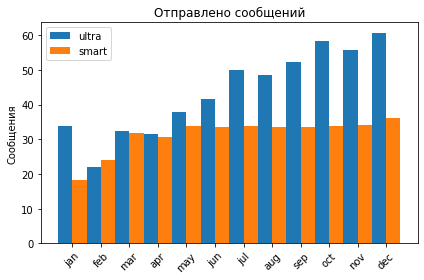

In [102]:

labels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
ultra_mes = total_mes_u['mean_messages']
smart_mes = total_mes_s['mean_messages']

x = np.arange(len(labels)) 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ultra_mes, width, label='ultra')
rects2 = ax.bar(x + width/2, smart_mes, width, label='smart')

ax.set_ylabel('Сообщения')
ax.set_title('Отправлено сообщений')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

### Вывод

* Выручка по тарифу Ultra немного больше, чем стоимость тарифа, пользователи платят за доп. услуги относительно немного. Выручка по тарифу Смарт в месяц почти в 3 раза выше, чем стоимость тарифа, так как большинство платят за доп. минуты и интернет.
* Пользователи тарифа Смарт в среднем разговаривают 395 минут используют 16 ГБ и отправляют 33 сообщения в месяц, при лимите 500 минут, 15 ГБ и 50 сообщений соответственно. Клиентам в среднем не хватает только интернета этом тарифе.
* Пользователи тарифа Ультра в среднем разговаривают 497 минут используют 19 ГБ и отправляют 49 сообщения в месяц, при лимите 3000 минут, 30 ГБ и 1000 сообщений соответственно.


Распределения количества потраченных минут за месяц  потраченного трафика за месяц на обоих тарифах похожи на нормальные. Распределения количества отправленных сообщений за месяц на обоих тарифахоба скошены вправо, большинство все-таки не отправляют сообщения.

# 4. Проверка гипотез

*средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;*


нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается;

In [103]:
from scipy import stats as st
smart_revenue = smart['revenue_per_month']
ultra_revenue = ultra['revenue_per_month']

alpha = 0.05

results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5550373403154774e-53
Отвергаем нулевую гипотезу


Таблицы для Москвы и других городов.

In [87]:
moscow = total.query('city == "Москва"')
moscow

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price,duration,extra_min_price,messages,extra_mes_price,revenue_per_month
8,1001,2018-11-01,18.0,41,2020-02-02,Москва,Иван,Ежов,2018-11-01,smart,600.0,409.0,0.0,0.0,0.0,0.0
9,1001,2018-12-01,14.0,41,2020-02-02,Москва,Иван,Ежов,2018-11-01,smart,0.0,392.0,0.0,0.0,0.0,0.0
17,1003,2018-08-01,9.0,23,2020-02-02,Москва,Белла,Белякова,2018-08-17,ultra,0.0,356.0,0.0,37.0,22.0,1972.0
18,1003,2018-09-01,13.0,23,2020-02-02,Москва,Белла,Белякова,2018-08-17,ultra,0.0,905.0,0.0,91.0,76.0,2026.0
19,1003,2018-10-01,15.0,23,2020-02-02,Москва,Белла,Белякова,2018-08-17,ultra,0.0,810.0,0.0,83.0,68.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,1490,2018-08-01,17.0,30,2020-02-02,Москва,Радомир,Алесин,2018-04-03,smart,400.0,329.0,0.0,50.0,0.0,950.0
3148,1490,2018-09-01,15.0,30,2020-02-02,Москва,Радомир,Алесин,2018-04-03,smart,0.0,306.0,0.0,48.0,0.0,550.0
3149,1490,2018-10-01,21.0,30,2020-02-02,Москва,Радомир,Алесин,2018-04-03,smart,1200.0,291.0,0.0,45.0,0.0,1750.0
3150,1490,2018-11-01,19.0,30,2020-02-02,Москва,Радомир,Алесин,2018-04-03,smart,800.0,266.0,0.0,47.0,0.0,1350.0


In [88]:
other = total.query('city != "Москва"')
other

,user_id,month,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,extra_gb_price,duration,extra_min_price,messages,extra_mes_price,revenue_per_month
0,1000,2018-05-01,3.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,151.0,0.0,22.0,7.0,1957.0
1,1000,2018-06-01,23.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,159.0,0.0,60.0,45.0,1995.0
2,1000,2018-07-01,14.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,319.0,0.0,75.0,60.0,2010.0
3,1000,2018-08-01,14.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,390.0,0.0,81.0,66.0,2016.0
4,1000,2018-09-01,15.0,52,2020-02-02,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,441.0,0.0,57.0,42.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,2018-11-01,0.0,46,2020-02-02,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,257.0,0.0,29.0,14.0,0.0
3210,1273,2018-12-01,0.0,46,2020-02-02,Курган,Рэм,Корнилов,2018-05-15,ultra,0.0,242.0,0.0,39.0,24.0,0.0
3211,1377,2018-02-01,0.0,59,2020-02-02,Брянск,Альфред,Семин,2018-02-25,ultra,0.0,169.0,0.0,2.0,0.0,0.0
3212,1392,2018-02-01,0.0,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,0.0,12.0,0.0,3.0,0.0,0.0


*средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;*

нулевая гипотеза: средняя выручка пользователей из Москвы  не отличается от выручки пользователей из других регионов;

In [89]:
moscow_revenue = moscow['revenue_per_month']
other_revenue = other['revenue_per_month']

alpha = 0.05

results = st.ttest_ind(moscow_revenue, other_revenue, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5725861759195832
Не получилось отвергнуть нулевую гипотезу


Средняя выручка от пользователей из Москвы статистически значимо не отличается от средней выручки в других городах. Но это логично, т.к.тарифы для всех городов одинаковы.

# Общий вывод

- У нас есть нулевые значения во времени звонка и количестве трафика.
- распределения количества потраченных минут за месяц, сообщений и трафика и увидели почти нормальные распределения, иногда со сдвигом, иногда - без.

Выручка по тарифу Ultra немного больше, чем стоимость тарифа, пользователи платят за доп. услуги относительно немного. Выручка по тарифу Смарт в месяц почти в 3 раза выше, чем стоимость тарифа, так как большинство платят за доп. минуты и интернет.

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается и в соответствии с графиками средняя выручка тарифа Смарт была от 644 руб до 1225 руб с человека, средняя выручка тарифа Ультра была от 1176 руб до 1734 руб с человека, это подтвердила проверка гипотезы о равенстве средней выручки пользователей разных тарифов. Соотвественно тариф Ультра можно считать более прибыльным.

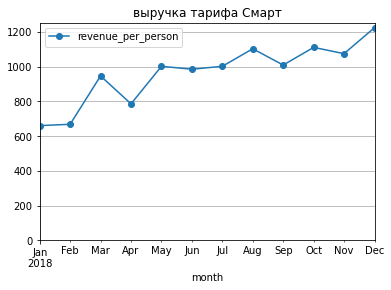

In [104]:
active_cus.plot(x='month',y='revenue_per_person', title='выручка тарифа Смарт', ylim=0,grid=True, style='o-');

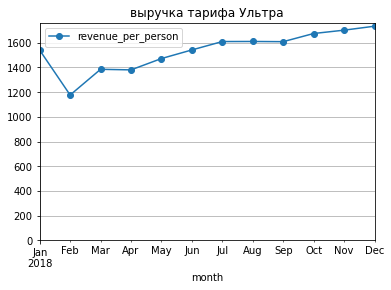

In [105]:
active_cus_u.plot(x='month',y='revenue_per_person', title='выручка тарифа Ультра', ylim=0,grid=True, style='o-');